In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
x,y=make_classification(n_samples=200,n_features=2,n_redundant=0,n_informative=2,random_state=1,n_clusters_per_class=1)

In [3]:
data=pd.DataFrame({"F1":x[:,0],'F2':x[:,1],'Y':y})

In [4]:
data.head()

,F1,F2,Y
0,0.711036,0.607188,0
1,1.123008,-0.092219,1
2,1.891575,-1.218104,1
3,0.009012,-1.251598,1
4,1.971966,-2.145050,1


<AxesSubplot:xlabel='F1', ylabel='F2'>

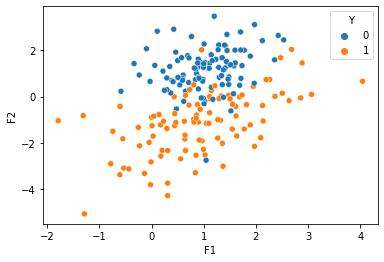

In [5]:
sns.scatterplot(x="F1",y='F2',hue='Y',data=data)

In [6]:
class logistic():
        def __init__(self):
                self.w=np.random.rand(2,1)
                self.b=0
                
        def hypothesis(self,X):
            
            return np.dot(X,self.w) + self.b
        
        def sigmoid(self,x):
            return 1/(1+np.exp(-x))
        
        def loss(self,y,y_pred):
                    cost = np.sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))/len(y)
                    
                    return cost
        
        def fit(self,X,Y,lr=0.001,epochs=100):
                    cost_list=list()
                    for i in range(1,epochs+1):
                                dw,db=0,0
                                y=Y.reshape(-1,1)
                                y_pred=self.sigmoid(self.hypothesis(X))
                                cost=self.loss(y,y_pred)
                                cost_list.append(cost)
                                m=X.shape[0]
                                dw=np.dot(X.T,(y_pred-y))/m
                                db = np.sum((y_pred-y))/m
                                self.w-=lr*dw
                                self.b-=lr*db
                    
                                
                    plt.plot(range(1,epochs+1),cost_list,linestyle='dashed')
                    plt.show()
                    
                    return (cost_list,self.w,self.b)
                
        def predict(self,X):
                y_pred=self.sigmoid(self.hypothesis(X))
                return y_pred
        
                    
                        
                        

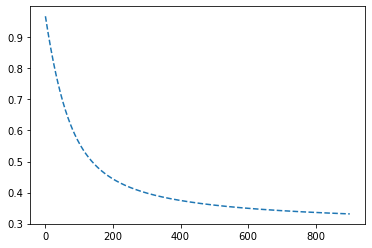

In [7]:
obj=logistic()
cost,w,b=obj.fit(x,y,lr=0.01,epochs=900)

In [8]:
k=obj.predict(x)

In [9]:
yu=(k>0.5).astype('int')

<AxesSubplot:>

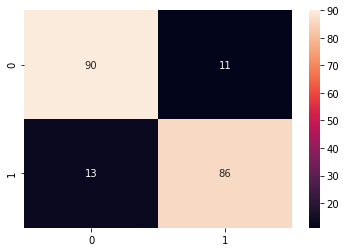

In [10]:
sns.heatmap(confusion_matrix(y,yu),annot=True)

In [11]:
accuracy_score(yu,y)*100

88.0